# Pyber 2018 
The 2018 Pyber riding data shows opportunities for market differentiation which can inform strategies to grow both our Pyber customer base and pool of Pyber drivers.

A. The ride characteristics for Rural areas may help us attract new Pyber drivers. The count of drivers in Rural towns is much smaller than Suburban or Urban areas yet the average fairs are higher. New drivers would face less competition from other Pyber drivers and earn above average fares compared to the typical Pyber driver in a Suburban or Urban area. (See I. Bubble Plot of Ride Sharing Data)

B. Select cities in Urban areas stand out because Pyber driver presence or bubble size is small and demand is strong as seen by above average total number of rides and average fares when compared to other Urban areas. (See I. Bubble Plot of Ride Sharing Data)

C. Higher average fares in rural and suburban markets indicate growth in ridership could be lucrative. Currently Rural and Suburban areas represent a small proportion of our business when you look at Total Fares, Total Rides and Total Drivers). Rural areas are single digits. Suburban areas are less than 1/3 or 33%. (See II. Total Fares by City Type, III. Total Rides by City Type and IV. Total Drivers by City Type)

In [2]:
# Renders figures in the notebook instead of just showing the object
%matplotlib inline

# Calls dependencies to create graphs, use data frames and do calculations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the unique City Data (n=120) and unique Ride Data (n=2375)
city_data = pd.read_csv(city_data_to_load)

ride_data = pd.read_csv(ride_data_to_load)

#Combine the data into a single datase (n=2375)
combined_pyber_df = pd.merge(ride_data, city_data,
                                  how='left', on='city')

combined_pyber_df.head ()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## I. Bubble Plot of Ride Sharing Data

In [3]:
# Calculate the average fare, total rides and driver count by city
avg_fare_city=combined_pyber_df.groupby("city").mean()["fare"]
tot_rides_city=combined_pyber_df.groupby("city").count()["date"]
ct_driver_city=combined_pyber_df.groupby("city").mean()["driver_count"]

# Bring in city type linking on city 
city_type = city_data.set_index('city')['type']


# Create a new data frame with the calculated variables
pyber_df = pd.DataFrame({"Average Fare": avg_fare_city, "Total Rides": tot_rides_city, 
                         "Driver Count":ct_driver_city, "City Types": city_type})


In [4]:
#Create city type specific data frames
rural = pyber_df[pyber_df["City Types"] == "Rural"]
suburban = pyber_df[pyber_df["City Types"] == "Suburban"]
urban = pyber_df[pyber_df["City Types"] == "Urban"]

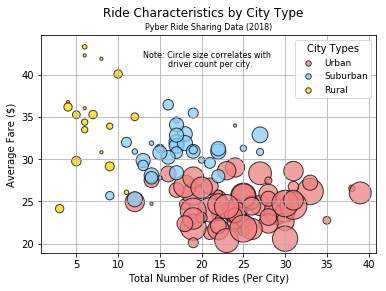

In [6]:
# Create color scheeme
city_color = {'Urban': ['lightcoral'], 'Suburban': ['lightskyblue'], 'Rural': ['gold']}

# Create three scatter plots for each city type
plt.scatter(urban['Total Rides'], urban['Average Fare'], marker="o",color = city_color['Urban'], edgecolor = 'black', 
            s = urban['Driver Count']*10, label = 'Urban', alpha = .75)

plt.scatter(suburban['Total Rides'], suburban['Average Fare'], marker="o",color = city_color['Suburban'], edgecolor = 'black', 
            s = suburban['Driver Count']*10, label = 'Suburban', alpha = .75)

plt.scatter(rural['Total Rides'], rural['Average Fare'], marker="o",color = city_color['Rural'], edgecolor = 'black', 
            s = rural['Driver Count']*10, label = 'Rural', alpha = .75)

# Assign chart titles and lables including note about label size
plt.suptitle('Ride Characteristics by City Type')
plt.title('Pyber Ride Sharing Data (2018)', fontsize=8)
plt.text(13,42,"Note: Circle size correlates with", fontsize=8)
plt.text(13,41,"          driver count per city.", fontsize=8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'lightgrey', title='City Types', fontsize=9)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Print and save the bubble chart with grid
plt.grid()


plt.savefig("Images/Bubble_plot_ride_share.png")


## II. Total Fares by City Type

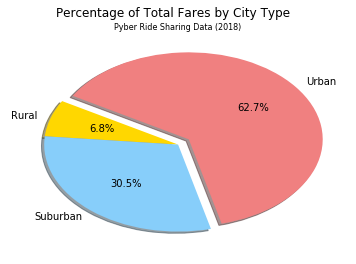

In [7]:
# Calculate the total fares by city type
city_type_fare_pie = combined_pyber_df.groupby(["type"])["fare"].sum()
city_type_fare_pie.index

# Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Only explode the third section of the pie chart.
explode = (0,0, 0.1)

# Create the pie chart
plt.pie(city_type_fare_pie, labels = city_type_fare_pie.index, autopct = "%1.1f%%", colors = colors, 
        explode = explode, shadow = True, startangle = 150)

# Create the titles
plt.suptitle('Percentage of Total Fares by City Type')
plt.title('Pyber Ride Sharing Data (2018)', fontsize=8)

# Print and save the chart

plt.savefig("Images/Pie_Total_Fares.png")


## III. Total Rides by City Type

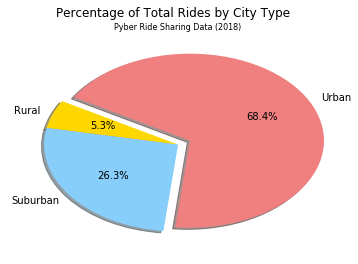

In [8]:
# Calculate the total rides by city type
city_type_rides_pie = combined_pyber_df.groupby(["type"])["date"].count()
city_type_rides_pie.index

# Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Only explode the third section of the pie chart.
explode = (0,0, 0.1)

# Create the pie chart
plt.pie(city_type_rides_pie, labels = city_type_rides_pie.index, autopct = "%1.1f%%", colors = colors, 
        explode = explode, shadow = True, startangle = 150)

# Create the titles
plt.suptitle('Percentage of Total Rides by City Type')
plt.title('Pyber Ride Sharing Data (2018)', fontsize=8)

# Print and save the chart

plt.savefig("Images/Pie_Total_Rides.png")


## IV. Total Drivers by City Type

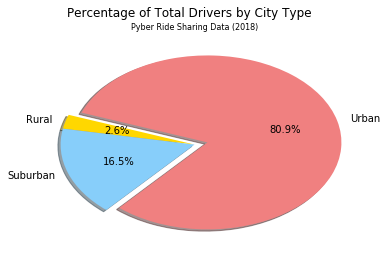

In [9]:
driver_pie = city_data.groupby(["type"])["driver_count"].sum()
driver_pie.index

# Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Only explode the third section of the pie chart.
explode = (0,0, 0.1)

# Create the pie chart
plt.pie(driver_pie, labels = driver_pie.index, autopct = "%1.1f%%", colors = colors, 
        explode = explode, shadow = True, startangle = 160)

# Create the titles
plt.suptitle('Percentage of Total Drivers by City Type')
plt.title('Pyber Ride Sharing Data (2018)', fontsize=8)

# Print and save the chart

plt.savefig("Images/Pie_Total_Drivers.png")
